# Section 3 Skill Challenge - Beer Servings

1. Read the drinks.csv file to read in the dataset, this time keeping the beer_servings sequence, into a new series in which the country name serves as the index. Assign this series to the variable `beers`

In [2]:
import pandas as pd

In [3]:
beers = pd.read_csv('https://gist.githubusercontent.com/sh7ata/e075ff35b51ebb0d2d577fbe1d19ebc9/raw/b966d02c7c26bcca60703acb1390e938a65a35cb/drinks.csv', usecols=['country','beer_servings'], index_col = 'country', squeeze = True)
beers

country
Afghanistan      NaN
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
               ...  
Venezuela      333.0
Vietnam        111.0
Yemen            6.0
Zambia          32.0
Zimbabwe        64.0
Name: beer_servings, Length: 193, dtype: float64

2. Calculate the mean, median, and standard deviation for the beer servings in `beers`. Determine whether this distribution is left- or right-skewed.

In [24]:
mean = beers.mean()
median = beers.median()
stdev = beers.std()
print('The mean is {}'.format(mean))
print('The median is {}'.format(median))
print('The standard deviation is {}'.format(stdev))


The mean is 102.87078651685393
The median is 60.0
The standard deviation is 100.64571267934778


* Because the mean is much larger than the median, the distribution is right-skewed. That is, most of the values are smaller than the mean and the tail goes to the right.

3. Slice the first 10 countries from `beers`. Are these relatively large or small relative to the rest of the sample?
 * To answer this, one approach is to compare each value to the mean or median. An even better approach would be to calculate **z-scores**.

In [9]:
first_ten = beers.head(10)
first_ten

country
Afghanistan            NaN
Albania               89.0
Algeria               25.0
Andorra              245.0
Angola               217.0
Antigua & Barbuda     12.0
Argentina            193.0
Armenia               21.0
Australia            261.0
Austria              279.0
Name: beer_servings, dtype: float64

In [12]:
print(first_ten.subtract(mean))
print(first_ten.subtract(median))

country
Afghanistan                 NaN
Albania              -13.870787
Algeria              -77.870787
Andorra              142.129213
Angola               114.129213
Antigua & Barbuda    -90.870787
Argentina             90.129213
Armenia              -81.870787
Australia            158.129213
Austria              176.129213
Name: beer_servings, dtype: float64
country
Afghanistan            NaN
Albania               29.0
Algeria              -35.0
Andorra              185.0
Angola               157.0
Antigua & Barbuda    -48.0
Argentina            133.0
Armenia              -39.0
Australia            201.0
Austria              219.0
Name: beer_servings, dtype: float64


 * Generally speaking, the majority of the first 10 countries have servings that are higher than both the median and the mean, suggesting that they are larger relative to the rest of the samples.

4. BONUS: Create a new series that uses series arithmetics to calculate the z-score for each serving by subtracting each from the mean and dividing the difference by the standard deviation. Point the variable `z_scores` to this series.

 * Which country has the largest absolute z-score? Is this a positive or negative deviation?

In [15]:
def z_score_calc(value):
  return (value - beers.mean()) / beers.std()

z_scores = beers.apply(z_score_calc)
z_scores

country
Afghanistan         NaN
Albania       -0.137818
Algeria       -0.773712
Andorra        1.412174
Angola         1.133970
                 ...   
Venezuela      2.286528
Vietnam        0.080771
Yemen         -0.962493
Zambia        -0.704161
Zimbabwe      -0.386214
Name: beer_servings, Length: 193, dtype: float64

In [21]:
print(z_scores.sort_values(ascending=False).head(1))
print(z_scores.sort_values(ascending=True).head(1))

country
Namibia    2.713769
Name: beer_servings, dtype: float64
country
Comoros   -1.012172
Name: beer_servings, dtype: float64


 * The country with the largest absolute z-score is Namibia, with a z-score of 2.71. This is a positive deviation from the mean. Namibia's beer servings are two standard deviations above the overall mean.

 How many beers is this?

In [28]:
beers.loc['Namibia']

376.0

Checking our math:

In [31]:
2.713769 * stdev + mean

376.0000015689749

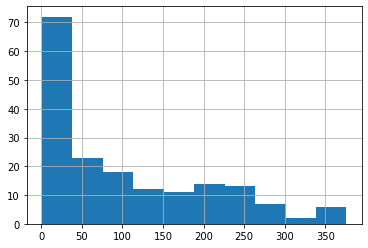

In [25]:
beers.hist()